**Exercise:**

Using the employee retention dataset:

* Perform exploratory data analysis (EDA) to identify which variables have a direct and clear impact on employee retention (i.e., whether employees leave the company or continue to work).
* Plot bar charts to show the impact of employee salaries on retention.
* Plot bar charts to illustrate the correlation between departments and employee retention.
* Build the different classifier models using the variables identified in step 1.
* Measure and report the accuracies of each models.
* Use cross_val_score with the models to measure the performance of each.

In [2]:
# Import necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

# Enable inline plotting for Jupyter notebooks.
%matplotlib inline

In [3]:
# Load the dataset.
df = pd.read_csv('hr_analytics.csv')

# Display the first 5 rows of the dataframe.
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
# Get the shape of the dataset.
num_rows, num_columns = df.shape

# Format the output and print it.
output = (
    f"Dataset Overview\n"
    f"{'-'*30}\n"
    f"Number of Rows    : {num_rows}\n"
    f"Number of Columns : {num_columns}\n"
    f"{'-'*30}"
)

print(output)

Dataset Overview
------------------------------
Number of Rows    : 14999
Number of Columns : 10
------------------------------


## Data Exploration and Visualization:

In [6]:
# Display a summary of statistics for each column in the dataframe.
# This includes count, mean, std deviation, min, 25%, 50%, 75%, and max values.
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
# Get value counts of the 'target' column to identify whether the dataset is imbalanced or not.
value_counts = df['left'].value_counts()

# Display the value counts.
print("Value counts of the 'left' column:\n")
print(value_counts)

Value counts of the 'left' column:

left
0    11428
1     3571
Name: count, dtype: int64


In [8]:
# Extract rows where employees left.
left = df[df.left == 1]

# Display the shape (number of rows and columns) of the 'left' dataframe.
print(f"Number of employees who left: {left.shape[0]}")

Number of employees who left: 3571


In [9]:
# Extract rows where employees were retained.
retained = df[df.left == 0]

# Display the shape (number of rows and columns) of the 'retained' dataframe.
print(f"Number of employees who stayed: {retained.shape[0]}")

Number of employees who stayed: 11428


In [10]:
# Group the dataframe by the 'left' column and calculate the mean for each group.
# This will help in understanding the average values of other features for employees who left vs those who stayed.
# Only include numeric columns to avoid TypeError.
numeric_df = df.select_dtypes(include=[np.number])
grouped_mean = numeric_df.groupby(df['left']).mean()

# Display the mean values for each group.
print("\nMean values grouped by 'left':")
grouped_mean


Mean values grouped by 'left':


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
left,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.0,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,1.0,0.005321


Based on the above table, we can draw the following conclusions:

* Satisfaction Level: The satisfaction level is relatively low (0.44) among employees who leave the firm, compared to those who are retained (0.66).

* Average Monthly Hours: Employees who leave the firm work more hours on average (207 hours) than those who stay (199 hours).

* Promotion in the Last 5 Years: Employees who receive promotions within the last five years are more likely to stay with the firm.

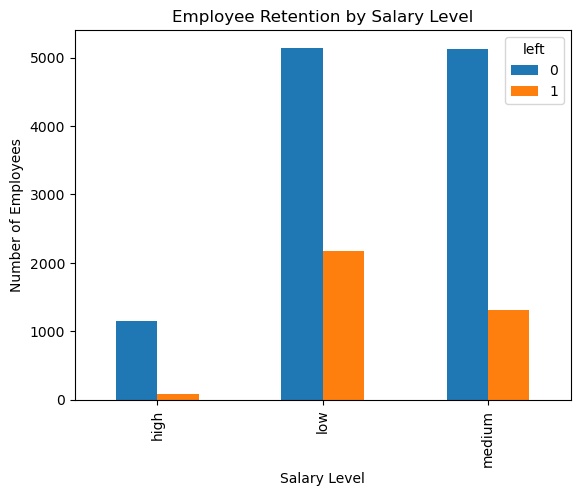

In [12]:
# Create a cross-tabulation of salary vs left and plot it as a bar chart.
# This will help in visualizing the relationship between salary levels and employee retention.
pd.crosstab(df.salary, df.left).plot(kind='bar')
plt.title('Employee Retention by Salary Level')
plt.xlabel('Salary Level')
plt.ylabel('Number of Employees')
plt.show()

The above bar chart indicates that employees with high salaries are less likely to leave the company.

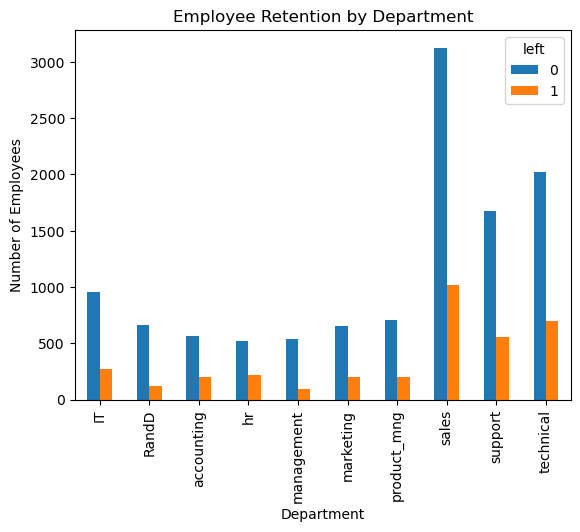

In [14]:
# Create a cross-tabulation of department vs left and plot it as a bar chart.
# This will help in visualizing the relationship between departments and employee retention.
pd.crosstab(df.Department, df.left).plot(kind='bar')

# Display the plot for department vs left.
plt.title('Employee Retention by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.show()

The above chart suggests that while the department has some impact on employee retention, it is not significant. Therefore, we will exclude the department from our analysis.

Based on the data analysis so far, we will include the following variables as independent variables in our model:

* Satisfaction Level
* Average Monthly Hours
* Promotion in the Last 5 Years
* Salary

In [17]:
# Select specific columns from the dataframe.
subdf = df[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'salary', 'left']]

# Display the first 5 rows of the subset dataframe.
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,left
0,0.38,157,0,low,1
1,0.80,262,0,medium,1
2,0.11,272,0,medium,1
3,0.72,223,0,low,1
4,0.37,159,0,low,1


## Data Preprocessing:

In [19]:
def remove_outliers(df: pd.DataFrame, columns: list, z_threshold: float = 3.0) -> pd.DataFrame:
    """
    Removes outliers from the dataframe based on the Z-score method.

    Parameters:
    - df: pd.DataFrame
        The input dataframe containing the data.
    - columns: list
        List of column names to check for outliers.
    - z_threshold: float
        The Z-score threshold to identify outliers (default is 3.0).

    Returns:
    - pd.DataFrame
        A new dataframe with outliers removed.
    """
    # Calculate Z-scores for specified columns.
    z_scores = df[columns].apply(lambda col: (col - col.mean()) / col.std())

    # Create a boolean mask where all z-scores are within the threshold.
    mask = (z_scores.abs() < z_threshold).all(axis=1)

    # Return the dataframe with outliers removed.
    return df[mask]

In [20]:
# Define the columns to check for outliers.
numerical_columns = subdf.select_dtypes(include=[np.number]).columns.tolist()

# Check if 'target' exists in numerical_columns and remove it if present.
if 'left' in numerical_columns:
    numerical_columns.remove('left')

# Remove outliers if they exist.
df_cleaned = remove_outliers(subdf, numerical_columns)

# Print the number of rows before and after removing outliers.
print(f"Original number of rows: {subdf.shape[0]}")
print(f"Number of rows after removing outliers: {df_cleaned.shape[0]}")

Original number of rows: 14999
Number of rows after removing outliers: 14680


In [21]:
# Obtain a list of all of the categorical variables in the training dataset.
s = (df_cleaned.dtypes == 'object')
object_cols = list(s[s].index)

# Print the list of categorical variables.
print(f"Categorical variables in the training dataset ({len(object_cols)}):")
print(object_cols)

Categorical variables in the training dataset (1):
['salary']


In [22]:
# Print all unique values in the categorical columns of the training dataset.
for col in object_cols:
    unique_values = df_cleaned[col].unique()
    print(f"Unique values in '{col}' column:")
    print(unique_values)
    print("\n")

# Identify and count number of unique entries in each categorical column of the training dataset.
object_nunique = [df_cleaned[col].nunique() for col in object_cols]

# Create a dictionary mapping each categorical column to its number of unique entries.
unique_counts_dict = dict(zip(object_cols, object_nunique))

# Sort the dictionary items by number of unique entries in ascending order.
sorted_unique_counts = sorted(unique_counts_dict.items(), key=lambda x: x[1])

# Print the sorted results.
print("Number of unique entries in each categorical column of training dataset, sorted in ascending order:")
for col, count in sorted_unique_counts:
    print(f"{col}: {count}")

Unique values in 'salary' column:
['low' 'medium' 'high']


Number of unique entries in each categorical column of training dataset, sorted in ascending order:
salary: 3


In [23]:
# Initialize OneHotEncoder.
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Apply one-hot encoding to the categorical columns.
# Use get_feature_names_out() to get the column names for the encoded data.
one_hot_encoded = pd.DataFrame(one_hot_encoder.fit_transform(df_cleaned[object_cols]), columns=one_hot_encoder.get_feature_names_out(object_cols))

# One-hot encoding removed index; put it back.
one_hot_encoded.index = df_cleaned.index

# Remove categorical columns from original datasets to get numerical columns only.
numerical_df = df_cleaned.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features.
subdf_encoded = pd.concat([numerical_df, one_hot_encoded], axis=1)

# Remove one encoded column from each category to take care of the dummy variable trap, ensuring the encoded data does not suffer from multi-collinearity.
for category in object_cols:
    category_encoded_columns = [col for col in subdf_encoded.columns if col.startswith(f'{category}_')]
    if category_encoded_columns:
        subdf_encoded.drop(columns=category_encoded_columns[0], inplace=True)

# Ensure all columns have string type.
subdf_encoded.columns = subdf_encoded.columns.astype(str)

# Display the dataframe after preprocessing.
subdf_encoded

,satisfaction_level,average_montly_hours,promotion_last_5years,left,salary_low,salary_medium
0,0.38,157,0,1,1.0,0.0
1,0.80,262,0,1,0.0,1.0
2,0.11,272,0,1,0.0,1.0
3,0.72,223,0,1,1.0,0.0
4,0.37,159,0,1,1.0,0.0
...,...,...,...,...,...,...
14994,0.40,151,0,1,1.0,0.0
14995,0.37,160,0,1,1.0,0.0
14996,0.37,143,0,1,1.0,0.0
14997,0.11,280,0,1,1.0,0.0


## Model Training and Prediction:

In [25]:
# Prepare the data for training.
X = subdf_encoded.drop('left', axis='columns') # Features (independent variable)
y = subdf_encoded['left']                      # Target   (dependent variable)

# Display the first 5 rows of features.
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_low,salary_medium
0,0.38,157,0,1.0,0.0
1,0.80,262,0,0.0,1.0
2,0.11,272,0,0.0,1.0
3,0.72,223,0,1.0,0.0
4,0.37,159,0,1.0,0.0


In [26]:
# Display the first 5 rows of the target variable.
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [27]:
# Split the dataset into training and testing sets.
# X_train: Training set features.
# X_test: Testing set features.
# y_train: Training set target variable.
# y_test: Testing set target variable.
# test_size=0.2: 20% of the data will be used for testing, 80% for training.
# stratify=y: Ensures the target variable 'y' is evenly distributed in both training and testing sets. It should be used in case of an imbalanced dataset.
# random_state=42: Ensures reproducibility of the split.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, stratify=y, random_state=42)

# Print the number of samples in training and testing sets.
print(f"{'Training set size':<20}: {len(X_train)} samples")
print(f"{'Testing set size':<20}: {len(X_test)} samples")

Training set size   : 11744 samples
Testing set size    : 2936 samples


In [28]:
# Create an instance of StandardScaler.
scaler = StandardScaler()

# Fit the scaler on the training data and transform it.
# This computes the mean and standard deviation on X_train and then scales X_train accordingly.
X_train_scaled_array = scaler.fit_transform(X_train)

# Use the previously computed mean and standard deviation to scale the test data.
X_test_scaled_array = scaler.transform(X_test)

# Convert the scaled arrays back to dataframes.
X_train_scaled = pd.DataFrame(X_train_scaled_array, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled_array, columns=X_test.columns, index=X_test.index)

### 1) Logistic Regression

In [30]:
# Instantiate and train the logistic regression model.
# Increase max_iter from default which is 100.
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [31]:
# Compute and print the training score of the trained model.
train_score = log_reg.score(X_train_scaled, y_train)
print(f"The training score is: {train_score:.3f}")

# Compute and print the testing score of the trained model.
test_score = log_reg.score(X_test_scaled, y_test)
print(f"The testing score is: {test_score:.3f}")

The training score is: 0.771
The testing score is: 0.776


In [32]:
# Initialize StratifiedKFold and split the dataset into n_splits equal parts by shuffling the data before splitting into folds to ensure random distribution of samples.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation using cross_val_score.
cv_scores = cross_val_score(log_reg, X_train_scaled, y_train, cv=skf, scoring='accuracy')

# Print the average cross-validation accuracy scores.
print(f"The logistic regression model's average cross-validation accuracy using StratifiedKFold: {np.mean(cv_scores):.3f}")

The logistic regression model's average cross-validation accuracy using StratifiedKFold: 0.771


In [33]:
# Make predictions on the test data.
y_predicted = log_reg.predict(X_test_scaled)

# Convert X_test to a dataframe (assuming X_test is a NumPy array or DataFrame).
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test_scaled.columns)

# Add 'Predicted Class' column to X_test_df.
X_test_df['Predicted Class'] = y_predicted

# Display the first few rows of the concatenated dataframe.
X_test_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_low,salary_medium,Predicted Class
1765,1.164723,0.570885,0.0,1.013028,-0.864499,0
7682,1.124508,0.470612,0.0,-0.987140,1.156739,0
7982,0.722356,-1.394471,0.0,1.013028,-0.864499,0
12469,-0.805821,-0.832941,0.0,1.013028,-0.864499,0
2556,0.078913,0.911814,0.0,-0.987140,1.156739,0


In [34]:
# Make probability predictions on the test data.
y_proba = log_reg.predict_proba(X_test_scaled)

# Convert the predicted probabilities to a dataframe.
proba_df = pd.DataFrame(y_proba, columns=log_reg.classes_, index=X_test_scaled.index)

# Display the first few rows of the formatted probability predictions.
proba_df.head()

,0,1
1765,0.889554,0.110446
7682,0.927390,0.072610
7982,0.869040,0.130960
12469,0.593700,0.406300
2556,0.818373,0.181627


### 2) Decision Tree

In [36]:
# Initialize and train the decision tree classifier.
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [37]:
# Compute and print the training score of the trained model.
train_score = dec_tree.score(X_train_scaled, y_train)
print(f"The training score is: {train_score:.3f}")

# Compute and print the testing score of the trained model.
test_score = dec_tree.score(X_test_scaled, y_test)
print(f"The testing score is: {test_score:.3f}")

The training score is: 0.982
The testing score is: 0.923


In [38]:
# Initialize StratifiedKFold and split the dataset into n_splits equal parts by shuffling the data before splitting into folds to ensure random distribution of samples.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation using cross_val_score.
cv_scores = cross_val_score(dec_tree, X_train_scaled, y_train, cv=skf, scoring='accuracy')

# Print the average cross-validation accuracy scores.
print(f"The decision tree model's average cross-validation accuracy using StratifiedKFold: {np.mean(cv_scores):.3f}")

The decision tree model's average cross-validation accuracy using StratifiedKFold: 0.921


In [39]:
# Make predictions on the test data.
y_predicted = dec_tree.predict(X_test_scaled)

# Convert X_test to a dataframe (assuming X_test is a NumPy array or DataFrame).
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test_scaled.columns)

# Add 'Predicted Class' column to X_test_df.
X_test_df['Predicted Class'] = y_predicted

# Display the first few rows of the concatenated dataframe.
X_test_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_low,salary_medium,Predicted Class
1765,1.164723,0.570885,0.0,1.013028,-0.864499,0
7682,1.124508,0.470612,0.0,-0.987140,1.156739,0
7982,0.722356,-1.394471,0.0,1.013028,-0.864499,0
12469,-0.805821,-0.832941,0.0,1.013028,-0.864499,1
2556,0.078913,0.911814,0.0,-0.987140,1.156739,0


In [40]:
# Make probability predictions on the test data.
y_proba = dec_tree.predict_proba(X_test_scaled)

# Convert the predicted probabilities to a dataframe.
proba_df = pd.DataFrame(y_proba, columns=log_reg.classes_, index=X_test_scaled.index)

# Display the first few rows of the formatted probability predictions.
proba_df.head()

,0,1
1765,1.0,0.0
7682,1.0,0.0
7982,1.0,0.0
12469,0.0,1.0
2556,1.0,0.0


### 3) Support Vector Machine

In [42]:
# Initialize and train the support vector machine classifier.
# SVC Parameters:
# - Regularization parameter (C): Controls the trade-off between maximizing the margin and minimizing the classification error.
#   Higher values of C emphasize classifying points correctly over wider margins, potentially leading to overfitting.
#   Lower values of C promote wider margins, which may generalize better but could increase classification errors.
#   Example: C = 1.0

# - Kernel type: Specifies the type of kernel function used for mapping inputs into higher-dimensional space.
#   Common choices include linear, polynomial, radial basis function (RBF), and sigmoid kernels.
#   Each kernel type influences the decision boundary's flexibility and complexity.
#   Example: kernel='rbf' for RBF kernel

# - Gamma parameter: Influences the kernel coefficient for 'rbf', 'poly', and 'sigmoid' kernels.
#   Higher gamma values lead to more complex decision boundaries, potentially resulting in overfitting.
#   Lower gamma values make the decision boundary smoother, promoting better generalization.
#   Example: gamma = 'scale', 'auto', or a specific float value
svm = SVC()
svm.fit(X_train_scaled, y_train)

SVC()

In [43]:
# Compute and print the training score of the trained model.
train_score = svm.score(X_train_scaled, y_train)
print(f"The training score is: {train_score:.3f}")

# Compute and print the testing score of the trained model.
test_score = svm.score(X_test_scaled, y_test)
print(f"The testing score is: {test_score:.3f}")

The training score is: 0.886
The testing score is: 0.886


In [44]:
# Initialize StratifiedKFold and split the dataset into n_splits equal parts by shuffling the data before splitting into folds to ensure random distribution of samples.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation using cross_val_score.
cv_scores = cross_val_score(svm, X_train_scaled, y_train, cv=skf, scoring='accuracy')

# Print the average cross-validation accuracy scores.
print(f"The support vector machine model's average cross-validation accuracy using StratifiedKFold: {np.mean(cv_scores):.3f}")

The support vector machine model's average cross-validation accuracy using StratifiedKFold: 0.886


In [45]:
# Make predictions on the test data.
y_predicted = svm.predict(X_test_scaled)

# Convert X_test to a dataframe (assuming X_test is a NumPy array or DataFrame).
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test_scaled.columns)

# Add 'Predicted Class' column to X_test_df.
X_test_df['Predicted Class'] = y_predicted

# Display the first few rows of the concatenated dataframe.
X_test_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_low,salary_medium,Predicted Class
1765,1.164723,0.570885,0.0,1.013028,-0.864499,0
7682,1.124508,0.470612,0.0,-0.987140,1.156739,0
7982,0.722356,-1.394471,0.0,1.013028,-0.864499,0
12469,-0.805821,-0.832941,0.0,1.013028,-0.864499,1
2556,0.078913,0.911814,0.0,-0.987140,1.156739,0


### 4) Random Forest

In [47]:
# Initialize and train the random forest classifier.
# RandomForestClassifier Parameters:
# - n_estimators: The number of trees in the forest.
#   Increasing the number of trees can improve the model's performance as more trees allow for a more robust
#   representation of the data, but it also increases computation time and memory usage.
#   Lower values may lead to underfitting, where the model does not capture the data complexity.
#   Example: n_estimators = 100
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [48]:
# Compute and print the training score of the trained model.
train_score = rf.score(X_train_scaled, y_train)
print(f"The training score is: {train_score:.3f}")

# Compute and print the testing score of the trained model.
test_score = rf.score(X_test_scaled, y_test)
print(f"The testing score is: {test_score:.3f}")

The training score is: 0.982
The testing score is: 0.936


In [49]:
# Initialize StratifiedKFold and split the dataset into n_splits equal parts by shuffling the data before splitting into folds to ensure random distribution of samples.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation using cross_val_score.
cv_scores = cross_val_score(rf, X_train_scaled, y_train, cv=skf, scoring='accuracy')

# Print the average cross-validation accuracy scores.
print(f"The random forest model's average cross-validation accuracy using StratifiedKFold: {np.mean(cv_scores):.3f}")

The random forest model's average cross-validation accuracy using StratifiedKFold: 0.931


In [50]:
# Make predictions on the test data.
y_predicted = rf.predict(X_test_scaled)

# Convert X_test to a dataframe (assuming X_test is a NumPy array or DataFrame).
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test_scaled.columns)

# Add 'Predicted Class' column to X_test_df.
X_test_df['Predicted Class'] = y_predicted

# Display the first few rows of the concatenated dataframe.
X_test_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_low,salary_medium,Predicted Class
1765,1.164723,0.570885,0.0,1.013028,-0.864499,0
7682,1.124508,0.470612,0.0,-0.987140,1.156739,0
7982,0.722356,-1.394471,0.0,1.013028,-0.864499,0
12469,-0.805821,-0.832941,0.0,1.013028,-0.864499,1
2556,0.078913,0.911814,0.0,-0.987140,1.156739,0


In [51]:
# Make probability predictions on the test data.
y_proba = rf.predict_proba(X_test_scaled)

# Convert the predicted probabilities to a dataframe.
proba_df = pd.DataFrame(y_proba, columns=log_reg.classes_, index=X_test_scaled.index)

# Display the first few rows of the formatted probability predictions.
proba_df.head()

,0,1
1765,0.96,0.04
7682,0.98,0.02
7982,0.93,0.07
12469,0.00,1.00
2556,1.00,0.00


### 5) Naive Bayes

In [53]:
# Initialize and train the gaussian naive bayes classifier.
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

GaussianNB()

In [54]:
# Compute and print the training score of the trained model.
train_score = gnb.score(X_train_scaled, y_train)
print(f"The training score is: {train_score:.3f}")

# Compute and print the testing score of the trained model.
test_score = gnb.score(X_test_scaled, y_test)
print(f"The testing score is: {test_score:.3f}")

The training score is: 0.770
The testing score is: 0.770


In [55]:
# Initialize StratifiedKFold and split the dataset into n_splits equal parts by shuffling the data before splitting into folds to ensure random distribution of samples.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation using cross_val_score.
cv_scores = cross_val_score(gnb, X_train_scaled, y_train, cv=skf, scoring='accuracy')

# Print the average cross-validation accuracy scores.
print(f"The gaussian naive bayes model's average cross-validation accuracy using StratifiedKFold: {np.mean(cv_scores):.3f}")

The gaussian naive bayes model's average cross-validation accuracy using StratifiedKFold: 0.770


In [56]:
# Make predictions on the test data.
y_predicted = gnb.predict(X_test_scaled)

# Convert X_test to a dataframe (assuming X_test is a NumPy array or DataFrame).
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test_scaled.columns)

# Add 'Predicted Class' column to X_test_df.
X_test_df['Predicted Class'] = y_predicted

# Display the first few rows of the concatenated dataframe.
X_test_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_low,salary_medium,Predicted Class
1765,1.164723,0.570885,0.0,1.013028,-0.864499,0
7682,1.124508,0.470612,0.0,-0.987140,1.156739,0
7982,0.722356,-1.394471,0.0,1.013028,-0.864499,0
12469,-0.805821,-0.832941,0.0,1.013028,-0.864499,0
2556,0.078913,0.911814,0.0,-0.987140,1.156739,0


In [57]:
# Make probability predictions on the test data.
y_proba = gnb.predict_proba(X_test_scaled)

# Convert the predicted probabilities to a dataframe.
proba_df = pd.DataFrame(y_proba, columns=log_reg.classes_, index=X_test_scaled.index)

# Display the first few rows of the formatted probability predictions.
proba_df.head()

,0,1
1765,0.879193,0.120807
7682,0.952394,0.047606
7982,0.827309,0.172691
12469,0.604093,0.395907
2556,0.890209,0.109791


### 6) K-Nearest Neighbors

In [59]:
# Initialize and train the k-nearest neighbors classifier.
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [60]:
# Compute and print the training score of the trained model.
train_score = knn.score(X_train_scaled, y_train)
print(f"The training score is: {train_score:.3f}")

# Compute and print the testing score of the trained model.
test_score = knn.score(X_test_scaled, y_test)
print(f"The testing score is: {test_score:.3f}")

The training score is: 0.938
The testing score is: 0.903


In [61]:
# Initialize StratifiedKFold and split the dataset into n_splits equal parts by shuffling the data before splitting into folds to ensure random distribution of samples.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation using cross_val_score.
cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=skf, scoring='accuracy')

# Print the average cross-validation accuracy scores.
print(f"The k-nearest neighbor model's average cross-validation accuracy using StratifiedKFold: {np.mean(cv_scores):.3f}")

The k-nearest neighbor model's average cross-validation accuracy using StratifiedKFold: 0.907


In [62]:
# Make predictions on the test data.
y_predicted = knn.predict(X_test_scaled)

# Convert X_test to a dataframe (assuming X_test is a NumPy array or DataFrame).
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test_scaled.columns)

# Add 'Predicted Class' column to X_test_df.
X_test_df['Predicted Class'] = y_predicted

# Display the first few rows of the concatenated dataframe.
X_test_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_low,salary_medium,Predicted Class
1765,1.164723,0.570885,0.0,1.013028,-0.864499,0
7682,1.124508,0.470612,0.0,-0.987140,1.156739,0
7982,0.722356,-1.394471,0.0,1.013028,-0.864499,0
12469,-0.805821,-0.832941,0.0,1.013028,-0.864499,1
2556,0.078913,0.911814,0.0,-0.987140,1.156739,0


In [63]:
# Make probability predictions on the test data.
y_proba = knn.predict_proba(X_test_scaled)

# Convert the predicted probabilities to a dataframe.
proba_df = pd.DataFrame(y_proba, columns=log_reg.classes_, index=X_test_scaled.index)

# Display the first few rows of the formatted probability predictions.
proba_df.head()

,0,1
1765,0.8,0.2
7682,1.0,0.0
7982,0.8,0.2
12469,0.0,1.0
2556,1.0,0.0


### 7) Confusion Matrices and Classification Reports for All Supervised Models

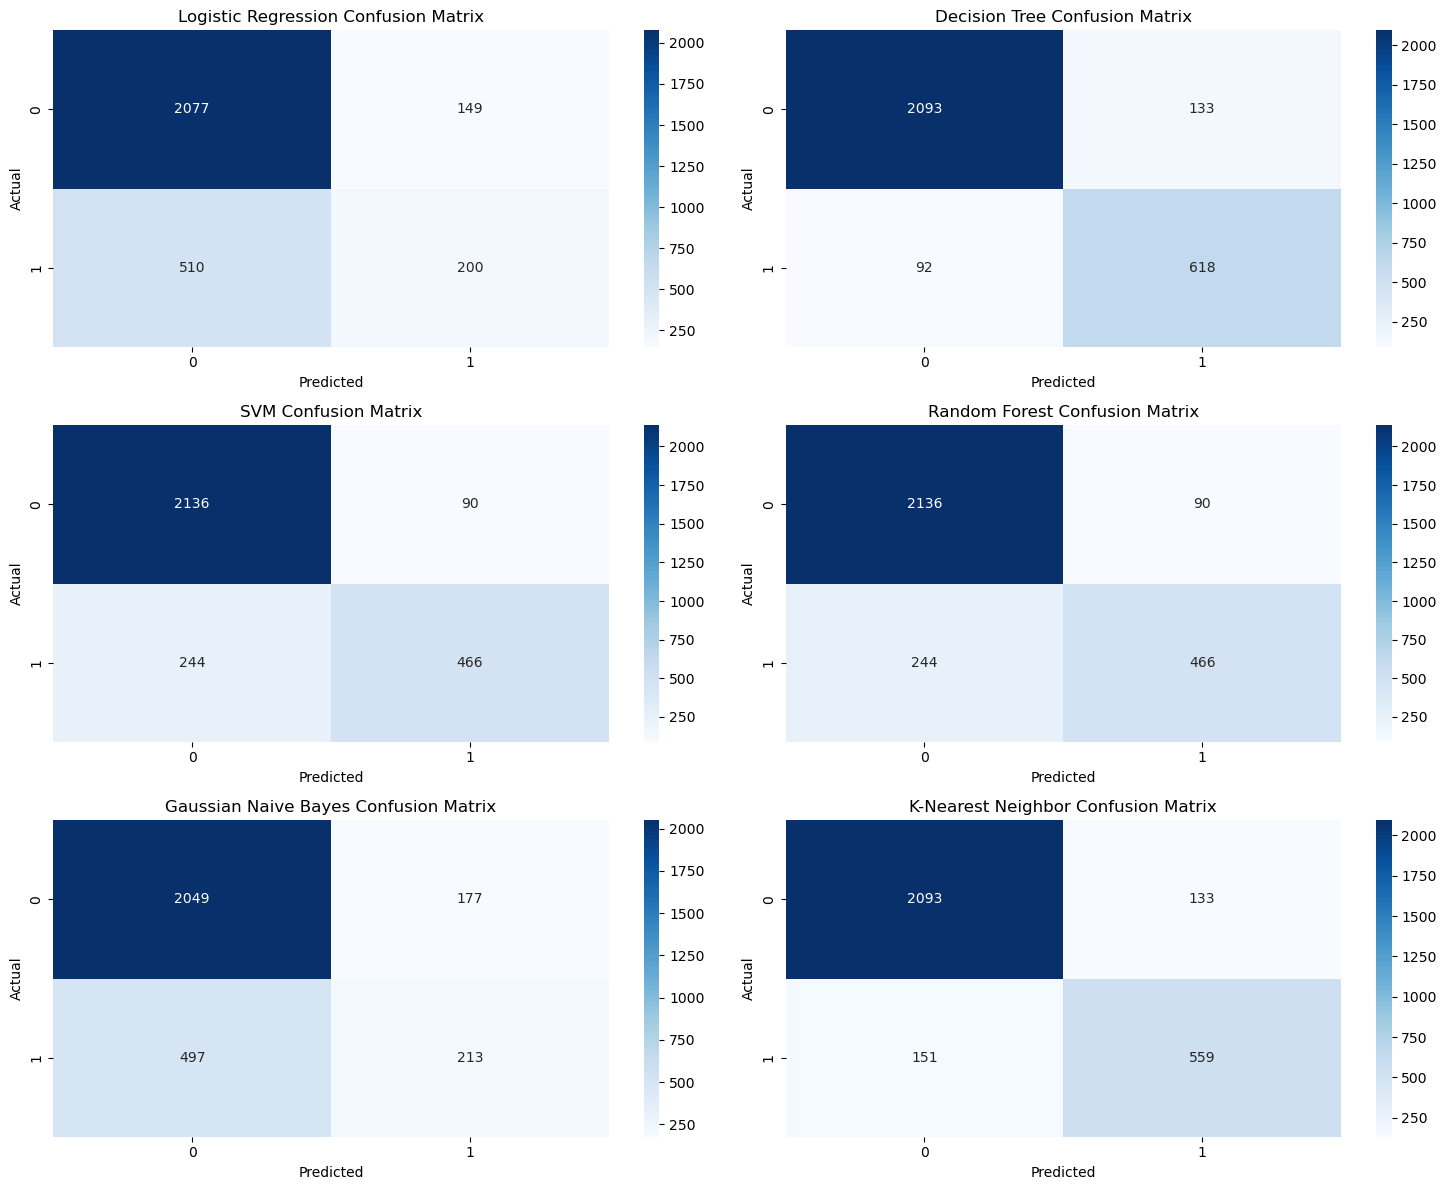

In [65]:
# Make predictions on the test set using each models.
log_reg_predictions = log_reg.predict(X_test_scaled)
dec_tree_predictions = dec_tree.predict(X_test_scaled)
svm_predictions = svm.predict(X_test_scaled)
rf_predictions = rf.predict(X_test_scaled)
gnb_predictions = gnb.predict(X_test_scaled)
knn_predictions = knn.predict(X_test_scaled)

# Generate and display confusion matrices for all models.
log_reg_cm = confusion_matrix(y_test, log_reg_predictions)
dec_tree_cm = confusion_matrix(y_test, dec_tree_predictions)
svm_cm = confusion_matrix(y_test, svm_predictions)
rf_cm = confusion_matrix(y_test, rf_predictions)
gnb_cm = confusion_matrix(y_test, gnb_predictions)
knn_cm = confusion_matrix(y_test, knn_predictions)

plt.figure(figsize=(15, 12))

# Plot for logistic regression.
plt.subplot(3, 2, 1)
sns.heatmap(log_reg_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')

# Plot for decision tree.
plt.subplot(3, 2, 2)
sns.heatmap(dec_tree_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')

# Plot for support vector machine.
plt.subplot(3, 2, 3)
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')

# Plot for random forest.
plt.subplot(3, 2, 4)
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')

plt.subplot(3, 2, 5)
sns.heatmap(gnb_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Gaussian Naive Bayes Confusion Matrix')

# Plot for k-nearest neighbor.
plt.subplot(3, 2, 6)
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('K-Nearest Neighbor Confusion Matrix')

plt.tight_layout()
plt.show()

In [66]:
# List of models and their predictions.
models = ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Random Forest', 'Gaussian Naive Bayes', 'K-Nearest Neighbor']
predictions = [log_reg_predictions, dec_tree_predictions, svm_predictions, rf_predictions, gnb_predictions, knn_predictions]

# Generate classification reports.
reports = [classification_report(y_test, pred, output_dict=True) for pred in predictions]

# Convert reports to a dataframe for better visualization and round to three decimal points.
report_df = [pd.DataFrame(report).transpose().round(3) for report in reports]

# Display classification reports.
for model, report in zip(models, report_df):
    print(f"Classification Report for {model}:\n")
    print(report)
    print("\n\n")

Classification Report for Logistic Regression:

              precision  recall  f1-score   support
0                 0.803   0.933     0.863  2226.000
1                 0.573   0.282     0.378   710.000
accuracy          0.776   0.776     0.776     0.776
macro avg         0.688   0.607     0.620  2936.000
weighted avg      0.747   0.776     0.746  2936.000



Classification Report for Decision Tree:

              precision  recall  f1-score   support
0                 0.958   0.940     0.949  2226.000
1                 0.823   0.870     0.846   710.000
accuracy          0.923   0.923     0.923     0.923
macro avg         0.890   0.905     0.897  2936.000
weighted avg      0.925   0.923     0.924  2936.000



Classification Report for Support Vector Machine:

              precision  recall  f1-score   support
0                 0.897   0.960     0.927  2226.000
1                 0.838   0.656     0.736   710.000
accuracy          0.886   0.886     0.886     0.886
macro avg         0.8

### 8) Bagging Classifier

In [68]:
# Define the base estimators.
base_estimators = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Apply BaggingClassifier to each base estimator.
for name, estimator in base_estimators.items():
    print(f"\nModel: {name}\n{'-'*30}")

    # Create a BaggingClassifier.
    bagging_model = BaggingClassifier(
        estimator=estimator,       # Base estimator (different models).
        n_estimators=100,          # Number of base estimators in the ensemble.
        max_samples=0.8,           # Fraction of samples to draw from X to train each base estimator.
        oob_score=True,            # Use out-of-bag samples to estimate the generalization error.
        random_state=42            # Seed for reproducibility.
    )

    # Fit the BaggingClassifier to the training data.
    bagging_model.fit(X_train_scaled, y_train)

    # Compute and print the out-of-bag score of the trained model.
    oob_score = bagging_model.oob_score_
    print(f"Out-of-Bag score is: {oob_score:.3f}")

    # Compute and print the testing score of the trained model.
    test_score = bagging_model.score(X_test_scaled, y_test)
    print(f"The testing score is: {test_score:.3f}")


Model: Logistic Regression
------------------------------
Out-of-Bag score is: 0.771
The testing score is: 0.775

Model: Decision Tree
------------------------------
Out-of-Bag score is: 0.933
The testing score is: 0.929

Model: Support Vector Machine
------------------------------
Out-of-Bag score is: 0.885
The testing score is: 0.886

Model: Random Forest
------------------------------
Out-of-Bag score is: 0.931
The testing score is: 0.933

Model: Gaussian Naive Bayes
------------------------------
Out-of-Bag score is: 0.771
The testing score is: 0.770

Model: K-Nearest Neighbors
------------------------------
Out-of-Bag score is: 0.913
The testing score is: 0.909


In [69]:
# Define the base estimators.
base_estimators = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Initialize StratifiedKFold and split the dataset into n_splits equal parts by shuffling the data before splitting into folds to ensure random distribution of samples.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Apply cross-validation to each base estimator.
for name, estimator in base_estimators.items():
    print(f"\nModel: {name}\n{'-'*30}")

    # Create a BaggingClassifier for the current base estimator.
    bagging_model = BaggingClassifier(
        estimator=estimator,        # Base estimator (different models).
        n_estimators=100,           # Number of base estimators in the ensemble.
        max_samples=0.8,            # Fraction of samples to draw from X to train each base estimator.
        random_state=42             # Seed for reproducibility.
    )

    # Perform cross-validation using cross_val_score.
    cv_scores = cross_val_score(bagging_model, X_train_scaled, y_train, cv=skf, scoring='accuracy')

    # Print the average cross-validation accuracy scores.
    print(f"Average cross-validation accuracy using StratifiedKFold: {np.mean(cv_scores):.3f}")


Model: Logistic Regression
------------------------------
Average cross-validation accuracy using StratifiedKFold: 0.771

Model: Decision Tree
------------------------------
Average cross-validation accuracy using StratifiedKFold: 0.933

Model: Support Vector Machine
------------------------------
Average cross-validation accuracy using StratifiedKFold: 0.885

Model: Random Forest
------------------------------
Average cross-validation accuracy using StratifiedKFold: 0.928

Model: Gaussian Naive Bayes
------------------------------
Average cross-validation accuracy using StratifiedKFold: 0.771

Model: K-Nearest Neighbors
------------------------------
Average cross-validation accuracy using StratifiedKFold: 0.910
